In [2]:
#SupervisedML(Linear Regression)
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#dataset
path = "http://bit.ly/w-data"
Data = pd.read_csv(path)
print('Data is successfully imported')
Data

Data is successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [8]:
import seaborn as sns

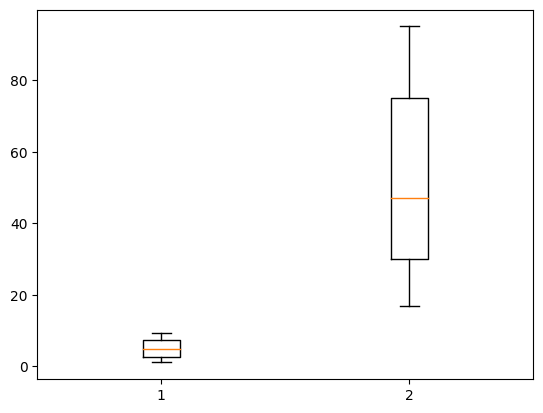

In [9]:
plt.boxplot(Data)
plt.show()

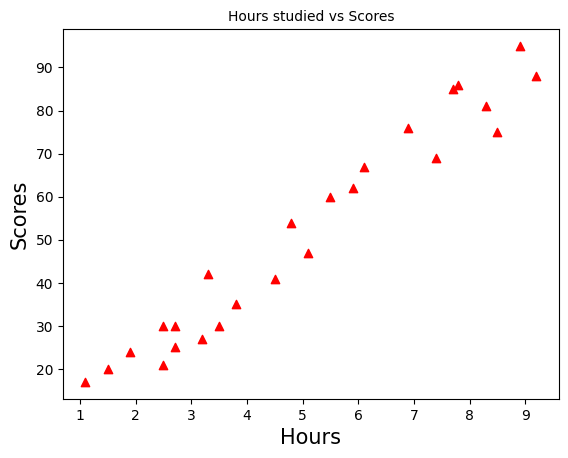

In [10]:
#Visualizing data
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.title('Hours studied vs Scores', fontsize=10)
plt.scatter(Data.Hours, Data.Scores, color='red', marker='^')
plt.show()

In [11]:
## Scatter plot indicates positive linear relationship

In [12]:
X= Data.iloc[:,:-1].values #to get 1st column, and -1 indicates not to include last column,scores.
Y= Data.iloc[:,1].values   
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [14]:
#Preparing Data and splitting into train and test sets

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state=0, test_size=0.2) #0.2 coz approx 20% samples will be assigned to test data, and remaining 80 to train data


In [17]:
## We have Splitted Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)   #shape gives rows traindata(80%, 20 here) and test data(20%, 5 below)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


In [18]:
#Training the Model

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [19]:
#fitting training data
linreg.fit(X_train, Y_train)
print('Training the algorithm is finished')

Training the algorithm is finished


In [20]:
print("B0 =", linreg.intercept_, "\nB1 =", linreg.coef_) #the intercept(point where the estimated regression line crosses the 𝑦 axis) and slope of line

B0 = 2.0181600414346974 
B1 = [9.91065648]


In [21]:
#plotting the REGRESSION LINE
Y0 = linreg.intercept_ + linreg.coef_*X_train 

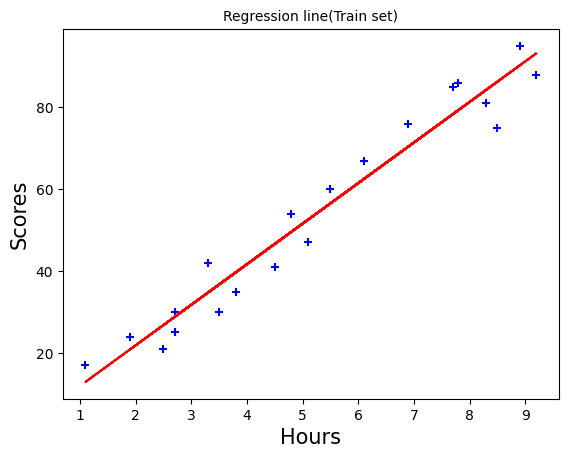

In [22]:
#plotting on train data
plt.scatter(X_train,Y_train,color='blue',marker='+')
plt.plot(X_train,Y0,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

Test Data

In [23]:
Y_pred = linreg.predict(X_test) #predicting scores for test data
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [24]:
#printing Y_test
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

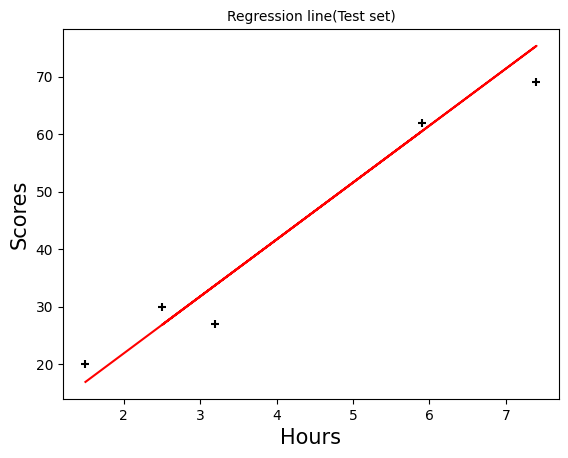

In [25]:
#plotting line on test data
plt.plot(X_test, Y_pred, color='red')
plt.scatter(X_test,Y_test,color='black',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

Comparing Actual vs Predicted Scores

In [26]:
Y_test1 = list(Y_test)
prediction = list(Y_pred)
df_compare = pd.DataFrame({'Actual':Y_test1, 'Result': prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#Accuracy of the model

In [27]:
from sklearn import metrics
metrics.r2_score(Y_test, Y_pred)  #Goodness of fit Test

0.9454906892105355

In [28]:
#Above 94% percentage indicates that above fitted Model is a GOOD MODEL

In [29]:
#Predicting the error

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
rms_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      =", MSE)
print("Root Mean Squared Error = ",rms_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      = 21.598769307217406
Root Mean Squared Error =  4.647447612100367
Mean Absolute Error     =  4.647447612100367


In [32]:
#Predicting the score

In [33]:
Prediction_score = linreg.predict([[9.25]])
print("Predicted score for student studying 9.25 hours :", Prediction_score)

Predicted score for student studying 9.25 hours : [93.69173249]


CONCLUSION:
From the above result, we can see that if a student studied for 9.25 hours, he will secure 93.69 MARKS.